# PROYECTO 4

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos fue procesado para su posterior análisis. Se obtuvo información acerca de las tendencias de los pedidos respecto al  tiempo, tipos de productos más populares, comportamiento de los clientes y recompra.




## Diccionario de datos
Se utilizaron cinco tablas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

In [1]:
import pandas as pd# importar librerías


Se importa la librería pandas usando el alias pd

In [2]:
df_orders=pd.read_csv("/datasets/instacart_orders.csv", sep=";")# leer conjuntos de datos en los DataFrames

Se crea un DataFrame de los pedidos leyendo el archivo en formato csv y poniendo entre comillas la ubicación del archivo. Como las columnas estan separadas por ";" pandas no lo reconoce y crea una sola columna, por lo cual se utilizó sep=";" para separar las columnas.

In [3]:
df_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
df_orders.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
df_products=pd.read_csv("/datasets/products.csv", sep=";")
df_products.info()## mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df_op=pd.read_csv("/datasets/order_products.csv", sep=";")
df_op.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Se utilizó show_counts=True para que pandas pudiera contar los datos no nulos ya que al tener muchas filas no lo incluye automáticamente en info.

In [7]:
df_aisles=pd.read_csv("/datasets/aisles.csv", sep=";")
df_aisles.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [8]:
df_departments=pd.read_csv("/datasets/departments.csv", sep=";")
df_departments.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes




Será necesario procesar datos nulos en los archivos y convertir datos a datetime



# Paso 2. Preprocesamiento de los datos



- Se verificó y corrigió los tipos de datos 
- Se Identificó y completó los valores ausentes.
- Se Identificó y eliminaron los valores duplicados.



### `orders` data frame

In [9]:
print("Número de valores duplicados:", df_orders.duplicated().sum())
print()
print("Valores duplicados en el df:\n", df_orders.value_counts())
print()
print("Valores de order_id duplicados:\n",df_orders["order_id"].value_counts())
# Revisa si hay pedidos duplicados


Número de valores duplicados: 15

Valores duplicados en el df:
 order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1021560   53767    3             3          2                  9.0                       2
467134    63189    21            3          2                  2.0                       2
391768    57671    19            3          2                  10.0                      2
2282673   86751    49            3          2                  2.0                       2
408114    68324    4             3          2                  18.0                      2
                                                                                        ..
1141863   88987    2             1          11                 14.0                      1
1141854   125458   91            6          8                  2.0                       1
1141847   156072   4             2          21                 6.0                       1
1141845   153218   2           

In [10]:
print(df_orders.duplicated(keep=False).sum())
df_orders[df_orders.duplicated(keep=False)].sort_values(by=["order_id"])#FORMA DE VISUALIZAR LOS DATOS DUPLICADOS. 
#KEEP FALSE MUESTRA TODOS LOS DATOS DUPLICADOS, NO SOLO EL PRIMERO. SORT_VALUES ORDENA LOS DATOS


30


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Se tienen 15 filas duplicadas, se repite el valor de order_id, el cual debería de ser único para cada pedido. Tienen en común el día de la semana en que se realizó el pedido (3) y la hora (2).

In [11]:
df_orders[(df_orders["order_dow"]==3)&(df_orders["order_hour_of_day"]==2)].sort_values(by=["order_id","user_id"])# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


In [12]:
df_orders.drop_duplicates(inplace=True)# Elimina los pedidos duplicados


In [13]:
df_orders.duplicated().sum()# Vuelve a verificar si hay filas duplicadas


0

In [14]:
df_orders["order_id"].duplicated().sum()# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


0

In [15]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


### `products` data frame

In [16]:
df_products[df_products.duplicated(keep=False)].sort_values(by=["product_id"])

,product_id,product_name,aisle_id,department_id


In [17]:
df_products.duplicated().sum()# Revisa únicamente si hay ID de productos duplicados


0

In [18]:
df_products["product_name"]=df_products["product_name"].str.upper()



In [19]:
 df_products["product_name"].duplicated().sum()# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


1361

In [20]:
df_products[df_products["product_name"].duplicated()].sort_values(by="product_id")
#ver cuáles son los duplicados

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [21]:
# Revisa si hay nombres duplicados de productos no faltantes


### `departments` data frame

In [22]:
df_departments.duplicated().sum()# Revisa si hay filas totalmente duplicadas

0

In [23]:
df_departments["department_id"].duplicated().sum()# Revisa únicamente si hay IDs duplicadas de departamentos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este archivo no se encontraron datos duplicados

### `aisles` data frame

In [24]:
df_aisles.duplicated().sum()# Revisa si hay filas totalmente duplicadas

0

In [25]:
df_aisles["aisle_id"].duplicated().sum()# Revisa únicamente si hay IDs duplicadas de pasillos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No encontré datos duplicados para este archivo

### `order_products` data frame

In [26]:
df_op.duplicated().sum()# Revisa si hay filas totalmente duplicadas


0

In [27]:
df_op["add_to_cart_order"]=df_op["add_to_cart_order"].astype("Int64")# Vuelve a verificar si hay cualquier otro duplicado engañoso


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Valores ausentes



* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [28]:
df_products["product_name"].isna().sum()

1258

In [29]:
df_products[df_products["product_name"].isna()]# Encuentra los valores ausentes en la columna 'product_name'

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


El valor ausente en la columna product_name es el producto con Id 38

In [30]:
df_departments[df_departments["department_id"]==21]
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


,department_id,department
20,21,missing


In [31]:
df_aisles[df_aisles["aisle_id"]==100]

,aisle_id,aisle
99,100,missing


el pasillo 100 y el departamento 21 tienen valores desconocidos

In [32]:
df_products["product_name"].fillna("Unknown", inplace=True)# Completa los nombres de productos ausentes con 'Unknown'


In [33]:
df_products["product_name"].isna().sum()

0

La columna product_name tenía valores ausentes relacionados con el desconocimiento del pasillo y departamento del producto. Se utilizó fillna() para cambiar los valores ausentes por la palabra Unknown.

In [34]:
df_products[df_products["product_name"]=="Unknown"]

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


### `orders` data frame

In [35]:
df_orders[df_orders["days_since_prior_order"].isna()]# Encuentra los valores ausentes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [36]:
valores_ausentes= df_orders[df_orders["days_since_prior_order"].isna()]
(valores_ausentes["order_number"]==1).all()


True

In [37]:
df_orders["days_since_prior_order"]=df_orders["days_since_prior_order"].fillna(0)

In [38]:
df_orders["days_since_prior_order"].isna().sum()

0

Todos los pedidos que se ordenan por primera vez tienen valores nulos en la columna days_since_prior_order, que representa los días transcurridos desde el último pedido del cliente, lo cual tiene sentido ya que es el primer pedido que realiza. Se cambiaron los valores ausentes por el valor 0, ya que han transcurrido 0 días desde la primer compra.

### `order_products` data frame

In [39]:
df_op["add_to_cart_order"].isna().sum()                         # Encuentra los valores ausentes

836

In [40]:
df_op[df_op["add_to_cart_order"].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,<NA>,0
9926,1968313,43867,<NA>,0
14394,2926893,11688,<NA>,0
16418,1717990,4142,<NA>,0
30114,1959075,42828,<NA>,1
...,...,...,...,...
4505662,1800005,7411,<NA>,0
4511400,1633337,260,<NA>,0
4517562,404157,9517,<NA>,0
4534112,1673227,17835,<NA>,0


In [41]:
df_op["add_to_cart_order"].min()
# ¿Cuáles son los valores mínimos y máximos en esta columna?


1

In [42]:
df_op["add_to_cart_order"].max()

64

Se encontró un valor nulo en la columna add_to_cart_order.
el valor mínimo de la columna es 1 y el máximo 64

In [43]:
v_ausentes=df_op[df_op["add_to_cart_order"].isna()]
ids_ausentes=v_ausentes["order_id"]
print(ids_ausentes)# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [44]:


# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
v_ausentes["product_id"].count()
pedido_completo = df_op[df_op["order_id"] == 2449164]
total_productos = len(pedido_completo)
print(f"El pedido 2449164 tiene {total_productos} productos en total")
print(f"¿Tiene más de 64 productos? {total_productos > 64}")
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.


# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.




El pedido 2449164 tiene 76 productos en total
¿Tiene más de 64 productos? True


El valor ausente en la columna add_to_card_order no se debe a que tenga más de 64 productos

In [45]:

# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entedf_op["add_to_cart_order"]ro.
df_op["add_to_cart_order"]=df_op["add_to_cart_order"].fillna(999).astype(int)
print(df_op[df_op["add_to_cart_order"]==999])


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                999          0
9926      1968313       43867                999          0
14394     2926893       11688                999          0
16418     1717990        4142                999          0
30114     1959075       42828                999          1
...           ...         ...                ...        ...
4505662   1800005        7411                999          0
4511400   1633337         260                999          0
4517562    404157        9517                999          0
4534112   1673227       17835                999          0
4535739   1832957       17949                999          1

[836 rows x 4 columns]


In [46]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [47]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [48]:
df_op.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


In [49]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [50]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones Intermedias


La columna product_name del DataFrame Products contiene un valor ausente que se cambió por "Unknown".
En el DataFrame orders, columna days_since_prior_orders, había muchos valores ausentes debido a que correspondian a clientes que habían hecho el primer pedido, por lo cual el valor debería de ser 0 y se cambiaron los valores ausentes.
En order_proucts habia 1 valor ausente en la columna "add_to_cart_order" y se cambió el valor a 999 para identificar que es un valor nulo.



# Paso 3. Análisis de los datos


In [51]:
df_orders["order_hour_of_day"].describe()

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

In [52]:
df_orders["order_dow"].describe()

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


Los valores mínimo y máximo de order_hour_of_day van del 0 al 23, corresponden a un formato de 24 horas
Los valores mínimo y máximo de order_dow van del 0 al 6, corresponden a los 7 días de la semana, iniciando con el cero que es domingo

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

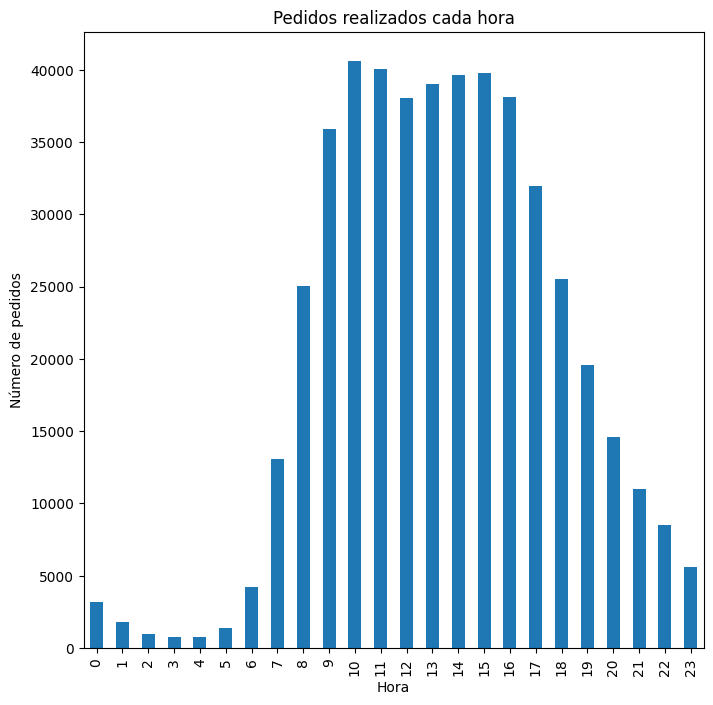

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

pedidos_por_hora = df_orders.groupby('order_hour_of_day').size()
pedidos_por_hora.plot(kind="bar", 
                     title="Pedidos realizados cada hora", 
                     figsize=(8,8), 
                     xlabel="Hora", 
                     ylabel="Número de pedidos")
plt.show()



las horas en las cuales se realizan más compras es de las 09:00 a 16:00 

### [A3] ¿Qué día de la semana compran víveres las personas?

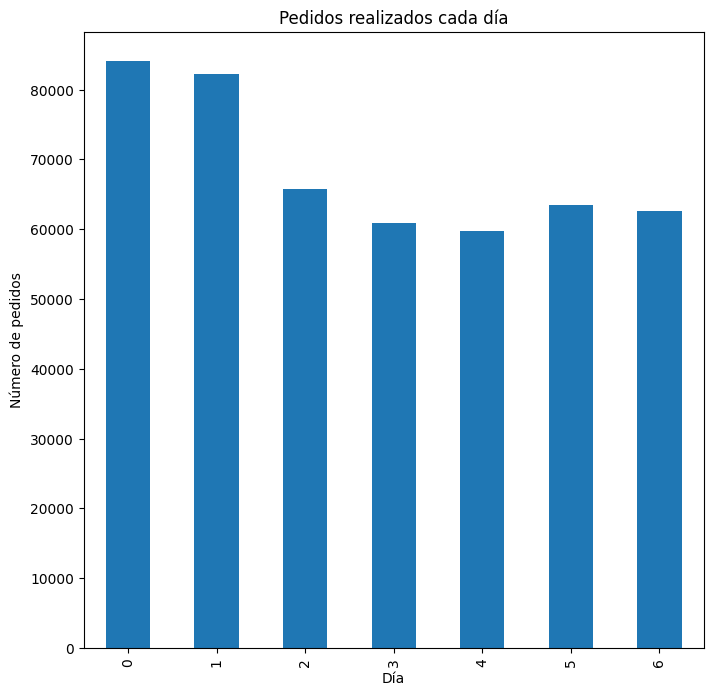

In [54]:
from matplotlib import pyplot as plt
%matplotlib inline
pedidos_por_día = df_orders.groupby('order_dow').size()
pedidos_por_día.plot(kind="bar", 
                     title="Pedidos realizados cada día", 
                     figsize=(8,8), 
                     xlabel="Día", 
                     ylabel="Número de pedidos")
plt.show()


Todos los días se compran víveres, siendo el domingo y lunes los días con mayor compra.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? 

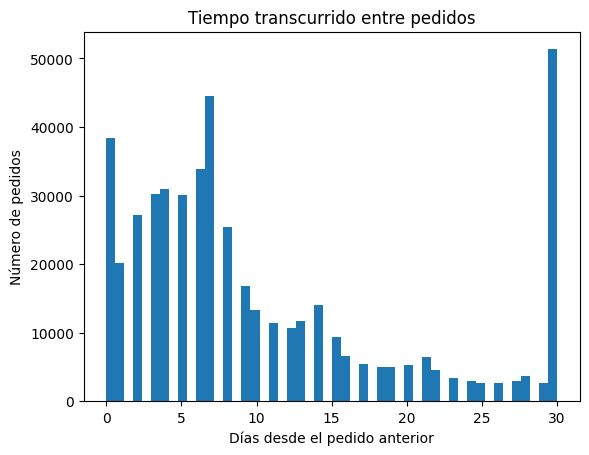

In [55]:
from matplotlib import pyplot as plt
%matplotlib inline

# Crear histograma SIN el parámetro title
df_orders['days_since_prior_order'].plot(kind="hist",bins=50,title="Tiempo transcurrido entre pedidos")

# Agregar título, etiquetasusando matplotlib

plt.xlabel("Días desde el pedido anterior")
plt.ylabel("Número de pedidos")
plt.show()

In [56]:
### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [57]:

from matplotlib import pyplot as plt
%matplotlib inline


In [58]:
orders_miercoles=df_orders[df_orders["order_dow"]==3].groupby("order_hour_of_day").size() 


In [59]:
orders_sabado= df_orders[df_orders["order_dow"]==6].groupby("order_hour_of_day").size()


In [60]:
df_comparacion = pd.DataFrame({
    'Miércoles': orders_miercoles,
    'Sábado': orders_sabado
})

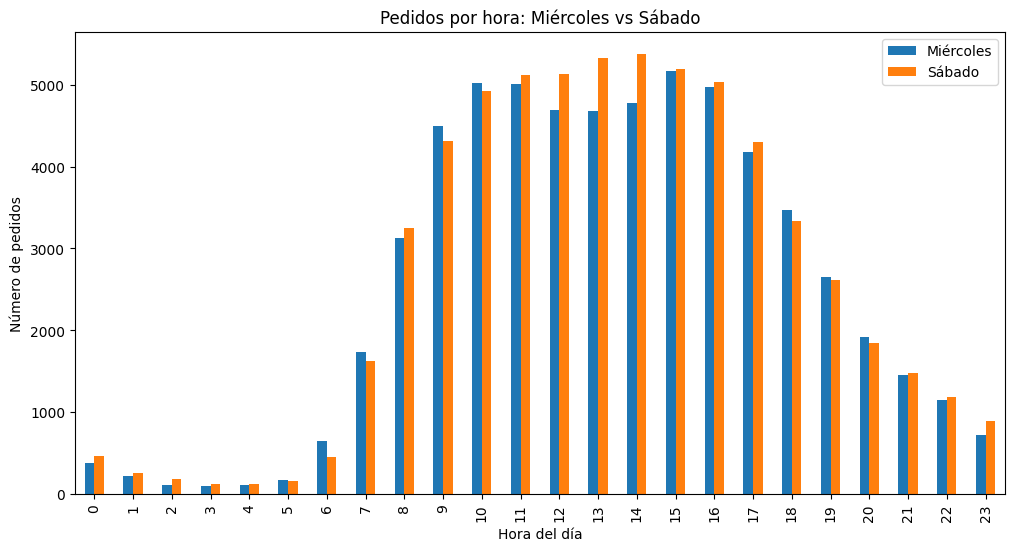

In [61]:
df_comparacion.plot(kind='bar', 
                   figsize=(12, 6))
plt.title("Pedidos por hora: Miércoles vs Sábado")
plt.xlabel("Hora del día")
plt.ylabel("Número de pedidos")
plt.legend(["Miércoles", "Sábado"])
plt.show()

las primeras horas del día, puesto que son madrugada se realizan pocos pedidos, siendo el sábado el día con mayor número de pedidos. A apartir de las 6:00 y hasta las 10:00 horas comienzan a aumentar los pedidos y se nota mayor actividad el miércoles. Las horas con más pedidos el día sábado abarcan un periodo de tiempo de las 11:00 a las 17:00 horas. El número de pedidos comienza a decaer las horas posteriores y el miércoles toma ventaja sobre el sábado.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

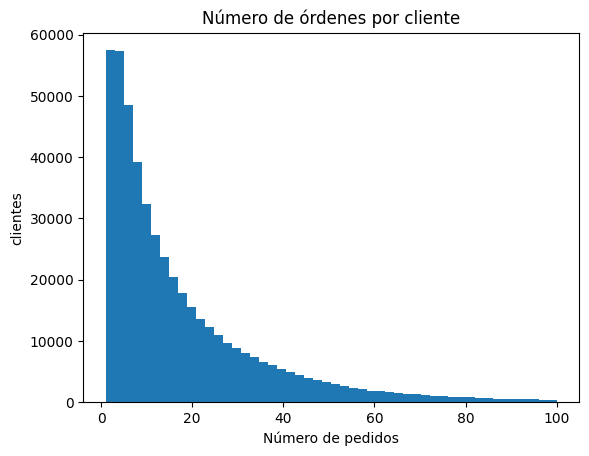

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline


df_orders['order_number'].plot(kind="hist",bins=50,title="Número de órdenes por cliente")



plt.xlabel("Número de pedidos")
plt.ylabel("clientes")
plt.show()

El número de pedidos por cliente va desde 1 pedido hasta 100 pedidos. A medida de que aumenta el número de pedidos disminuye el número de clientes que lo realizan. La mayoría de los clientes ha hecho pedidos inferiores a 20

### [B3] ¿Cuáles son los 20 productos más populares?

In [63]:
productos_populares = df_op['product_id'].value_counts().head(20)
print(productos_populares)


24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [64]:
df_merged = pd.merge(df_products, df_op, on='product_id', how='inner')


In [65]:
productos=df_merged.groupby("product_id")["product_name"].value_counts()

In [66]:
print(productos.sort_values(ascending=False).head(20))

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: product_name, dtype: int64


LOS PRODUCTOS MÁS POPULARES SON FRUTAS Y VEGETALES

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [67]:
df_op.groupby("order_id")["product_id"].count()#Tomar los datos de order_products, columnas order_id y product_id

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

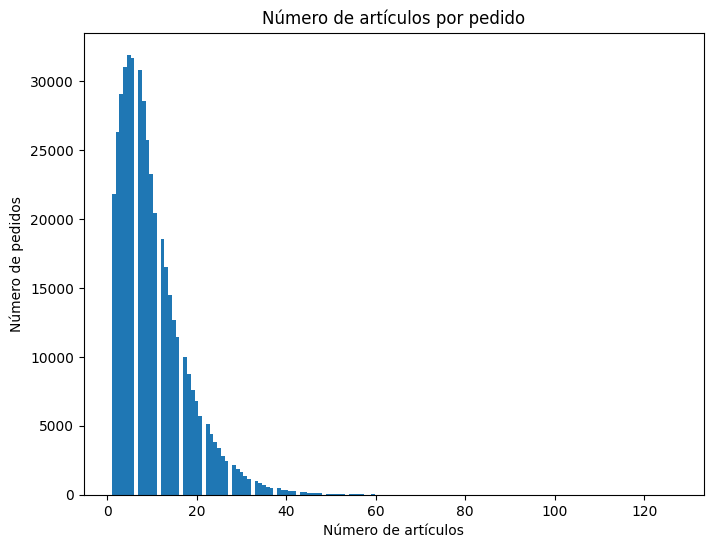

In [68]:
from matplotlib import pyplot as plt
%matplotlib inline
articulos_por_pedido = df_op.groupby("order_id")["product_id"].count()
articulos_por_pedido.plot(kind="hist", bins=150,
                     title="Número de artículos por pedido", 
                     figsize=(8,6))
plt.xlabel("Número de artículos")
plt.ylabel("Número de pedidos")

plt.show()

EL PICO MÁS ALTO DE NÚMERO DE ARTÍCULOS POR PEDIDO OSCILA EN LOS 5 ARTICULOS POR PEDIDO

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [69]:
#cúantas veces el mismo cliente pidió el artículo, información en orders_products, columas order_id(identifica el pedido), product_id (identifica el producto realizado) y user_id(identifica el cliente que lo realizó). Combinar con products para obtener la infprmación del nombre del producto

In [70]:



df_fusion= pd.merge(df_op,df_products,on="product_id")
df_fusion.groupby(["product_id","product_name"])["reordered"].sum().sort_values(ascending=False).head(20)




product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: reordered, dtype: int64

LOS 20 PRODUCTOS QUE MÁS SE REORDENARON COINCIDEN EN GRAN MEDIDA CON LOS 20 PRODUCTOS MÁS POPULARES, LOS CUALES SON FRUTAS Y VEGETALES

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [71]:
pedidos_totales=df_fusion.groupby(["product_id","product_name"])["order_id"].count()

In [72]:
pedidos_reordenados=df_fusion.groupby(["product_id","product_name"])["reordered"].sum()

In [100]:
proporcion= pedidos_reordenados/pedidos_totales
print(proporcion.head(20))


product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
8           CUT RUSSET POTATOES STEAM N' MASH                                    0.315789
9           LIGHT STRAWBERRY BLUEBERRY YOGURT                                    0.761905
10          SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE                       0.448071
11          PEACH MANGO JUICE                                                    0.625000
12          CHOCOLATE FUDGE LAYER CAKE                                           0.390244
13          SALINE NAS


LA PROPORCIÓN DE RECOMPRA 1 INDICA QUE EL 100% DE LAS VECES QUE SE HA PEDIDO ESTE PRODUCTO FUE RECOMPRADO, CONFOMRE SE ACERCA AL CERO, ESTOS PRODUCTOS SE RECOMPRARON MENOS, LO CUAL PUEDE SUGERIR QUE NO SON PRODUCTOS BÁSICOS O QUE NO FUERON DEL AGRADO DEL CLIENTE.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [74]:
df_fusion.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1


In [85]:
df_3= pd.merge(df_fusion,df_orders, on="order_id")
productos_pedidos=df_3.groupby(["user_id"])["product_id"].count()
productos_pedidos.head()

user_id
2    26
4     2
5    12
6     4
7    14
Name: product_id, dtype: int64

In [87]:
productos_reordenados=df_3.groupby(["user_id"])["reordered"].sum()
productos_reordenados.head()

user_id
2     1
4     0
5     8
6     0
7    13
Name: reordered, dtype: int64

In [84]:

proporcion_clientes_prod_reordenados=productos_reordenados/productos_pedidos
print(proporcion_clientes_prod_reordenados.head(100))


user_id
2      0.038462
4      0.000000
5      0.666667
6      0.000000
7      0.928571
         ...   
128    0.000000
129    0.571429
132    0.800000
133    0.553719
137    0.857143
Length: 100, dtype: float64



CON EL DATO OBTENIDO PODEMOS IDENTIFICAR CLIENTES FRECUENTES A MEDIDA QUE LA PROPORCIÓN SE ACERQUE A 1


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [98]:
filtro=df_fusion[df_fusion["add_to_cart_order"]==1]
filtro.groupby(["product_id"])["product_name"].value_counts().sort_values(ascending=False).head(20)
#Saber qué artículos repiten con mayor frecuencia el número 1 en la columna add_to_cart_order

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

LOS ARTÍCULOS QUE PONEN LAS PERSONAS PRIMERO EN SUS CARRITOS COINCIDEN CON LOS PRODUCTOS MÁS POPULARES

### Conclusion general del proyecto:

DERIVADO DEL PROCESAMIENTO Y ANÁLISIS DE DATOS, SE CONCLUYE LO SIGUIENTE:
EL PERIODO DE TIEMPO CON MAYOR ACTIVIDAD DE PEDIDOS EN LA APLICACIÓN COMPRENDE DESDE 09:00 A 17:00 HORAS, SIENDO LOS DÍAS DOMINGO Y LUNES CUANDO MÁS PEDIDOS SE REALIZAN. ASIMISMO, LOS CLIENTES RECOMPRAN PRINCIPALMENTE DE MANERA SEMANAL Y MENSUAL.
LA MAYOR PARTE DE LOS CLIENTES HA HECHO MENOS DE 20 PEDIDOS.
LOS PRODUCTOS MÁS POPULARES SON LAS FRUTAS Y VEGETALES, ASÍ COMO PRODUCTOS ORGÁNICOS. LA BANANA Y BOLSA DE BANANAS ORGANICAS SON LOS PRODUCTOS FAVORITOS DE LOS USUARIOS, INCLUSO SE PIDEN CON MAYOR FRECUENCIA Y SON LOS PRIMEROS QUE SE AGREGAN AL CARRITO.